# Quantum Half Adder

## Classical version

1 XOR gate + 1 AND gate

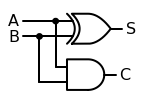

In [4]:
import SchemDraw as schemdraw
import SchemDraw.logic as logic
d = schemdraw.Drawing(unit=.5)
S = d.add(logic.XOR2, rgtlabel='$S$')
A = d.add(logic.DOT, xy=S.in1)
d.add(logic.LINE, d='left', l=d.unit*2, lftlabel='$A$')
d.add(logic.LINE, d='left', xy=S.in2)
B = d.add(logic.DOT)
d.add(logic.LINE, d='left', lftlabel='$B$')

d.add(logic.LINE, d='down', xy=A.start, l=d.unit*3)
C = d.add(logic.AND2, d='right', anchor='in1', rgtlabel='$C$')
d.add(logic.LINE, d='down', xy=B.start, toy=C.in2)
d.add(logic.LINE, to=C.in2)
d.draw()

## Quantum Version

XOR = 2 CX gates
AND = 1 CCX gate

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4,2)

# init values, default 1+1
qc.x(0)
qc.x(1)
qc.barrier()

# xor gate
qc.cx(0,2)
qc.cx(1,2)
qc.barrier()

# and gate
qc.ccx(0,1,3)
qc.barrier()

# measure
qc.measure([2,3], [0,1])

In [6]:
# Draw circuit
qc.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     ├───┤ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c_0: ══════════════════════════════╩══╬═
                                      ║ 
c_1: ═════════════════════════════════╩═

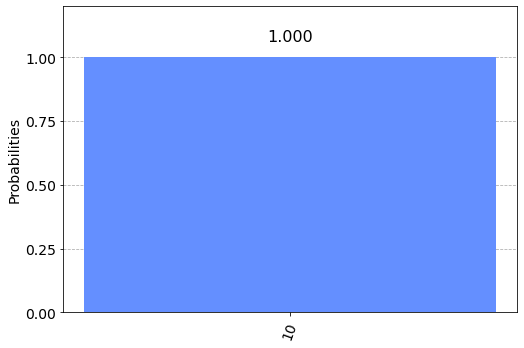

In [7]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
# Execute experiment
result = execute(qc, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts()
plot_histogram(counts)